In [119]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Comparing the image of Taj Mahal with its transformed version 

In [120]:
img1=cv2.imread('Taj.jpg')
train_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
# Downsizing image twice 
# The new dimensions would be 1/4th of the original 
test_img=cv2.pyrDown(cv2.pyrDown(img1))
n_rows,n_cols=test_img.shape[:2]

In [121]:
rot_matrix=cv2.getRotationMatrix2D((n_cols/2,n_rows/2),30,1)
test_img=cv2.warpAffine(test_img,rot_matrix,(n_cols,n_rows))
test_gray=cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)

#### Plotting original vs transformed image

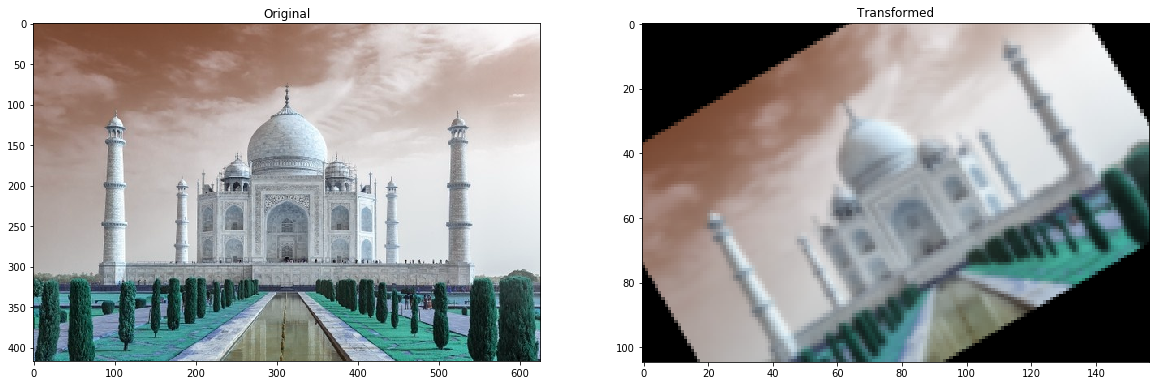

In [122]:
fx,plots=plt.subplots(1,2,figsize=(20,10))
plots[0].set_title('Original')
plots[0].imshow(img1)
plots[1].set_title('Transformed')
plots[1].imshow(test_img)

#### Drawing key-points on image

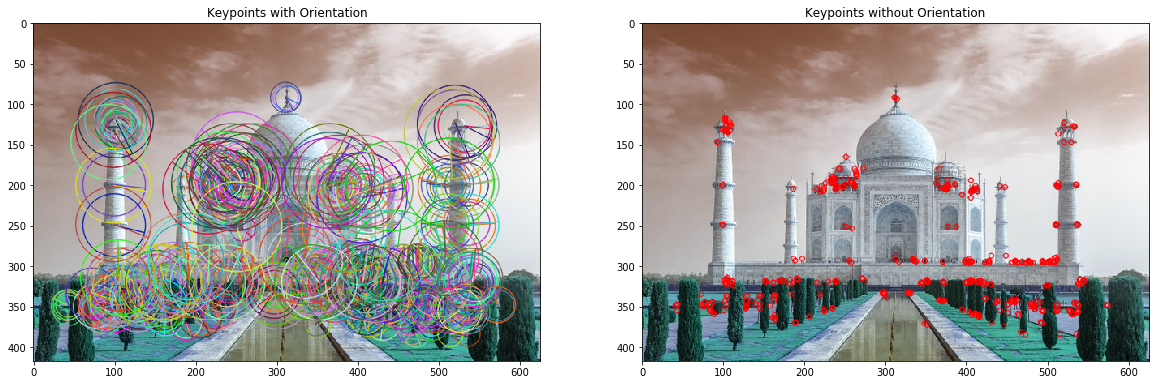

In [123]:
orb = cv2.ORB_create()
train_keypts, train_des = orb.detectAndCompute(train_gray,None)
test_keypts, test_des = orb.detectAndCompute(test_gray,None)

kp_without_size=np.copy(img1)
kp_with_size=np.copy(img1)
cv2.drawKeypoints(img1,train_keypts,kp_with_size,flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(img1,train_keypts,kp_without_size,color=(255,0,0))

fx,plots=plt.subplots(1,2,figsize=(20,10))
plots[0].set_title('Keypoints with Orientation')
plots[0].imshow(kp_with_size)
plots[1].set_title('Keypoints without Orientation')
plots[1].imshow(kp_without_size)

In [124]:
print('Keypoints in original image:',len(train_keypts))
print('Keypoints in transformed image:',len(test_keypts))

Keypoints in original image: 500
Keypoints in transformed image: 108


#### There are 500 keypoints in original image & 108 keypoints in the transformed image. Each keypoint is described by a 128 size vector. 

* The feature matrix for original image: 500 X 128
* The feature matrix for transformed image: 108 X 128

#### The Hamming distance between each keypoint of original image and each keypoint of transformed image is found. Hence, 500 X 108 distance matrix is obtained. 

#### We sort the matches according to the increasing order of distances & pick initial 10 matches as Good

In [125]:
bf=cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches=bf.match(train_des,test_des)
matches = sorted(matches, key = lambda x:x.distance)
res=cv2.drawMatches(img1,train_keypts,test_img,test_keypts,matches[:10],test_img,flags=2)
res=cv2.resize(res,(1000,600))
cv2.imshow('Feature Matches',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [126]:
print('Accuracy of feature match:',str(len(matches)/min(len(train_keypts),len(test_keypts))))

Accuracy of feature match: 0.5092592592592593


### Comparing the Image of Taj Mahal with an unrelated image

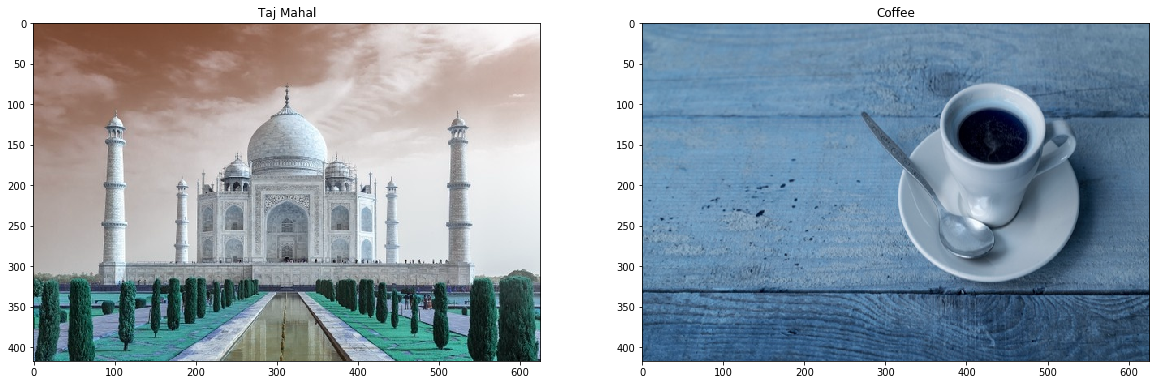

In [130]:
img1=cv2.imread('Taj.jpg')
train_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
# Downsizing image twice 
# The new dimensions would be 1/4th of the original 
test_img=cv2.imread('coffee.jpg')
test_img=cv2.resize(test_img,(626,417))
test_gray=cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
fx,plots=plt.subplots(1,2,figsize=(20,10))
plots[0].set_title('Taj Mahal')
plots[0].imshow(img1)
plots[1].set_title('Coffee')
plots[1].imshow(test_img)

#### Plotting key-points with size & orientation

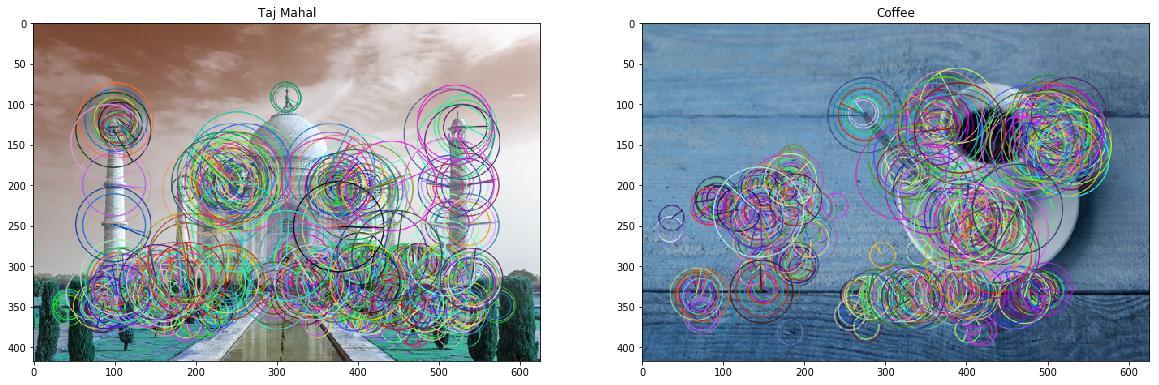

In [132]:
orb = cv2.ORB_create()
train_keypts, train_des = orb.detectAndCompute(train_gray,None)
test_keypts, test_des = orb.detectAndCompute(test_gray,None)

taj=np.copy(img1)
cof=np.copy(test_img)
cv2.drawKeypoints(img1,train_keypts,taj,flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(test_img,test_keypts,cof,flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

fx,plots=plt.subplots(1,2,figsize=(20,10))
plots[0].set_title('Taj Mahal')
plots[0].imshow(taj)
plots[1].set_title('Coffee')
plots[1].imshow(cof)

#### Plotting key-points without size/orientation

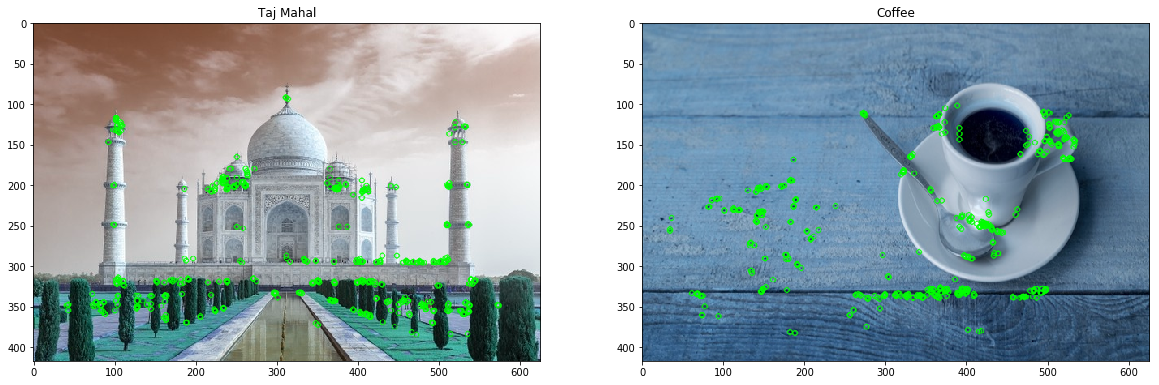

In [133]:
taj=np.copy(img1)
cof=np.copy(test_img)
cv2.drawKeypoints(img1,train_keypts,taj,color=(0,255,0))
cv2.drawKeypoints(test_img,test_keypts,cof,color=(0,255,0))

fx,plots=plt.subplots(1,2,figsize=(20,10))
plots[0].set_title('Taj Mahal')
plots[0].imshow(taj)
plots[1].set_title('Coffee')
plots[1].imshow(cof)

In [134]:
bf=cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches=bf.match(train_des,test_des)
matches = sorted(matches, key = lambda x:x.distance)
res=cv2.drawMatches(img1,train_keypts,test_img,test_keypts,matches[:10],test_img,flags=2)
res=cv2.resize(res,(1000,600))
cv2.imshow('Feature Matches',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [135]:
print('Accuracy of feature match:',str(len(matches)/min(len(train_keypts),len(test_keypts))))

Accuracy of feature match: 0.254


#### We see that the accuracy of ORB feature match between original image & transformed image of Taj Mahal is 50.92% whereas the accuracy of feature match between completely unrelated images is 25.4%